# Analyzing Popular Design Trends Using Social Media Data
This notebook analyzes design trends using data from Instagram and Pinterest. We will extract trending colors, patterns, and themes from the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## Load the Datasets

In [ ]:
instagram_df = pd.read_csv('cleaned_instagram_design_trends (1).csv')
pinterest_df = pd.read_csv('pinterest_design_trends.csv')
instagram_df.head(), pinterest_df.head()

(                               post_url   username   likes  comments  \
 0  https://www.instagram.com/p/7304088/  user_7974  4098.0     489.0   
 1  https://www.instagram.com/p/8987452/  user_9587  3670.0     232.0   
 2  https://www.instagram.com/p/7051032/  user_9406  2973.0     191.0   
 3  https://www.instagram.com/p/1532550/  user_2581  1107.0     371.0   
 4  https://www.instagram.com/p/8610926/  user_8880  2672.0      91.0   
 
   post_type            post_date  engagement_score  \
 0     Image  2025-01-31 06:21:48       4475.206907   
 1     Video  2025-02-11 06:21:48       2448.658428   
 2     Video  2024-09-19 06:21:48        732.602534   
 3  Carousel  2024-03-05 06:21:48       3217.530999   
 4     Image  2024-10-27 06:21:48         47.149954   
 
                                             hashtags  \
 0                      #colortrends #wallart #modern   
 1               #luxuryhomes #colortrends #homedecor   
 2  #colortrends #minimalist #homedecor #interiord...   


## Data Cleaning

In [ ]:
print('Missing values in Instagram data:')
print(instagram_df.isnull().sum())



Missing values in Instagram data:
post_url              0
username              0
likes                50
comments             50
post_type             0
post_date             0
engagement_score      0
hashtags             50
detailed_hashtags    50
dtype: int64


In [ ]:
print('Missing values in Pinterest data:')
print(pinterest_df.isnull().sum())

Missing values in Pinterest data:
post_id             0
hashtags            0
likes               0
comments            0
engagement_score    0
post_date           0
dtype: int64


In [ ]:
instagram_df.fillna({'likes': instagram_df['likes'].median(), 'comments': instagram_df['comments'].median()}, inplace=True)
pinterest_df.fillna({'likes': pinterest_df['likes'].median(), 'comments': pinterest_df['comments'].median()}, inplace=True)

In [ ]:
print('Duplicates in Instagram data:', instagram_df.duplicated().sum())
print('Duplicates in Pinterest data:', pinterest_df.duplicated().sum())

instagram_df.drop_duplicates(inplace=True)
pinterest_df.drop_duplicates(inplace=True)

Duplicates in Instagram data: 0
Duplicates in Pinterest data: 0


## Descriptive Statistics

In [ ]:
instagram_df.describe(), pinterest_df.describe()

(             likes    comments  engagement_score
 count   500.000000  500.000000        500.000000
 mean   2352.514000  253.176000       2676.843414
 std    1388.274973  139.967721       1599.096423
 min      17.000000    0.000000         11.702700
 25%    1187.750000  137.000000       1332.295584
 50%    2276.000000  262.000000       2694.455942
 75%    3461.500000  365.000000       4058.132356
 max    4998.000000  500.000000       5482.475398,
              likes    comments  engagement_score
 count   500.000000  500.000000        500.000000
 mean   2498.746000  238.582000          5.357851
 std    1425.114834  141.651875          2.608606
 min      56.000000    5.000000          1.006698
 25%    1284.250000  120.000000          3.206996
 50%    2475.500000  236.500000          5.272356
 75%    3753.000000  356.750000          7.650257
 max    4996.000000  500.000000          9.971510)

## Measure of Central Tendency (Reference 4)

In [ ]:
instagram_likes_mean = instagram_df['likes'].mean()
instagram_likes_median = instagram_df['likes'].median()
instagram_likes_mode = instagram_df['likes'].mode()[0]
print(f'Instagram Likes - Mean: {instagram_likes_mean}, Median: {instagram_likes_median}, Mode: {instagram_likes_mode}')

Instagram Likes - Mean: 2352.514, Median: 2276.0, Mode: 2276.0


In [ ]:
pinterest_likes_mean = pinterest_df['likes'].mean()
pinterest_likes_median = pinterest_df['likes'].median()
pinterest_likes_mode = pinterest_df['likes'].mode()[0]
print(f'Pinterest Likes - Mean: {pinterest_likes_mean}, Median: {pinterest_likes_median}, Mode: {pinterest_likes_mode}')

Pinterest Likes - Mean: 2498.746, Median: 2475.5, Mode: 666


## Visualization of Likes Distribution

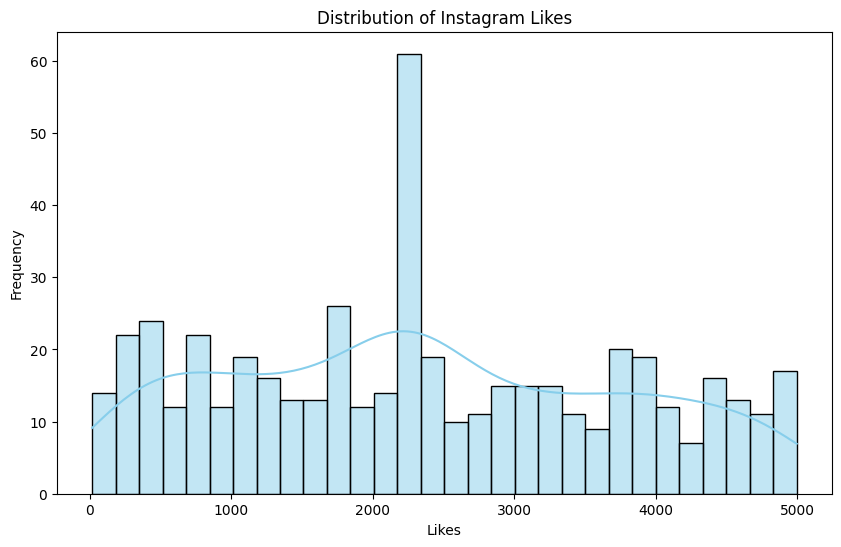

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(instagram_df['likes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Instagram Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

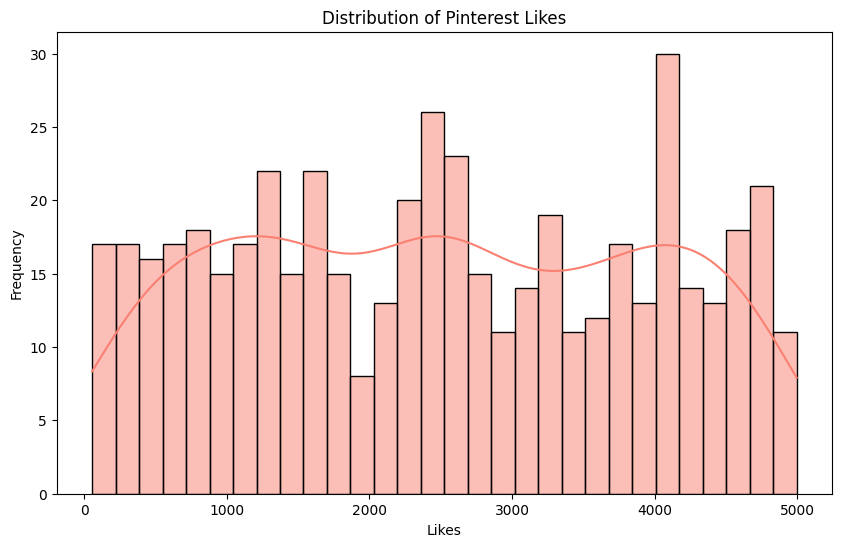

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pinterest_df['likes'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Pinterest Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

## Hashtag Analysis

In [ ]:
instagram_hashtags = instagram_df['hashtags'].str.split(',', expand=True).stack().value_counts()
pinterest_hashtags = pinterest_df['hashtags'].value_counts()

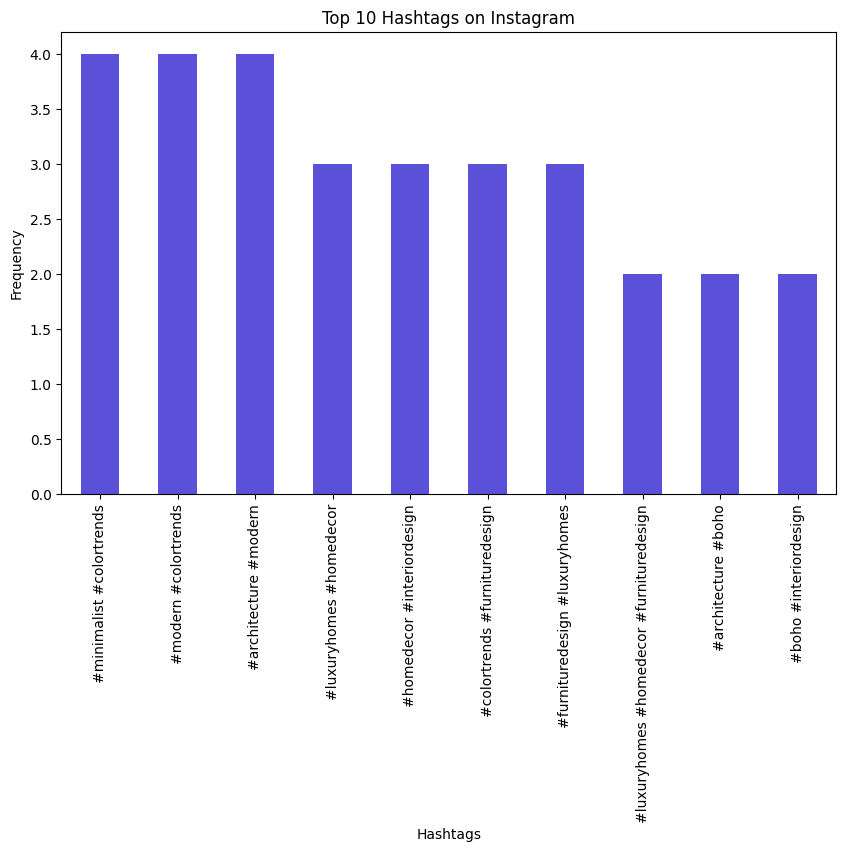

In [ ]:
plt.figure(figsize=(10, 6))
instagram_hashtags.head(10).plot(kind='bar', color='#5b51d8')
plt.title('Top 10 Hashtags on Instagram')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

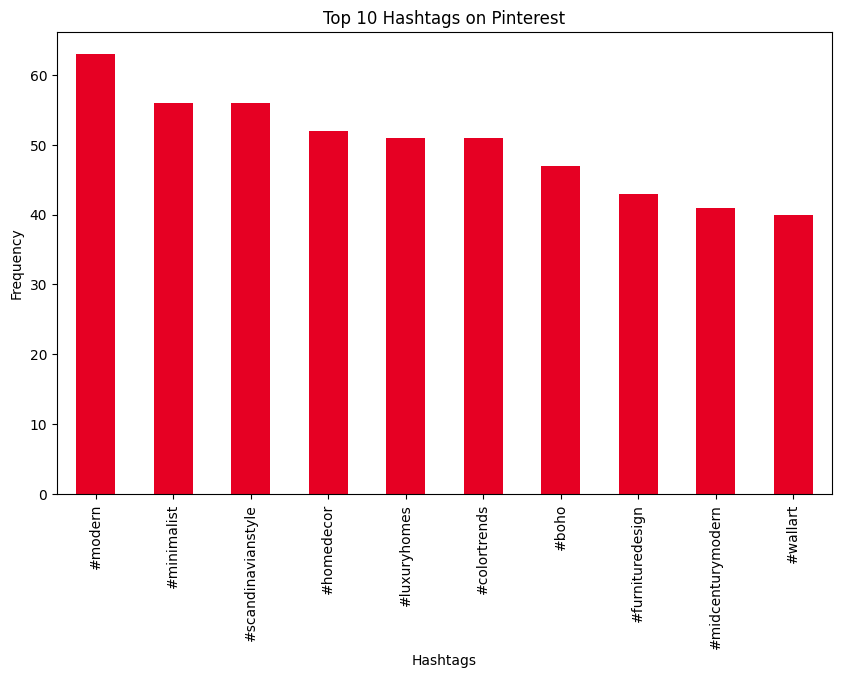

In [ ]:
plt.figure(figsize=(10, 6))
pinterest_hashtags.head(10).plot(kind='bar', color='#E60023')
plt.title('Top 10 Hashtags on Pinterest')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

## Engagement Score Analysis

In [ ]:
instagram_engagement_mean = instagram_df['engagement_score'].mean()
instagram_engagement_median = instagram_df['engagement_score'].median()
instagram_engagement_mode = instagram_df['engagement_score'].mode()[0]
print(f'Instagram Engagement - Mean: {instagram_engagement_mean}, Median: {instagram_engagement_median}, Mode: {instagram_engagement_mode}')

Instagram Engagement - Mean: 2676.8434137942186, Median: 2694.45594169219, Mode: 11.70270048233174


In [ ]:
pinterest_engagement_mean = pinterest_df['engagement_score'].mean()
pinterest_engagement_median = pinterest_df['engagement_score'].median()
pinterest_engagement_mode = pinterest_df['engagement_score'].mode()[0]
print(f'Pinterest Engagement - Mean: {pinterest_engagement_mean}, Median: {pinterest_engagement_median}, Mode: {pinterest_engagement_mode}')

Pinterest Engagement - Mean: 5.357851244277522, Median: 5.272355974062773, Mode: 1.006698066546085


## Correlation Analysis

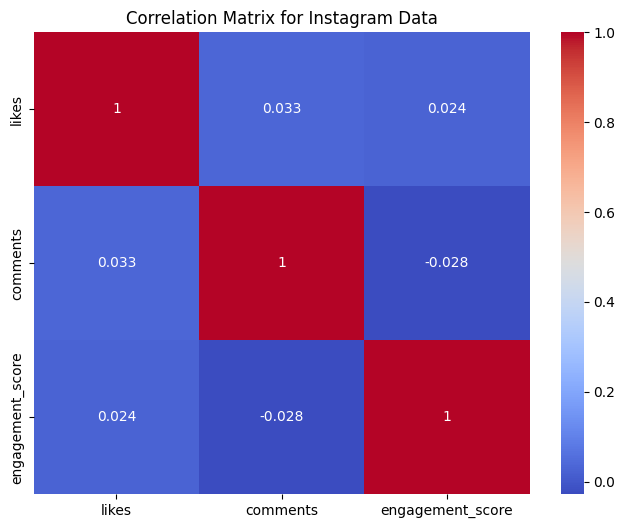

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(instagram_df[['likes', 'comments', 'engagement_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Instagram Data')
plt.show()

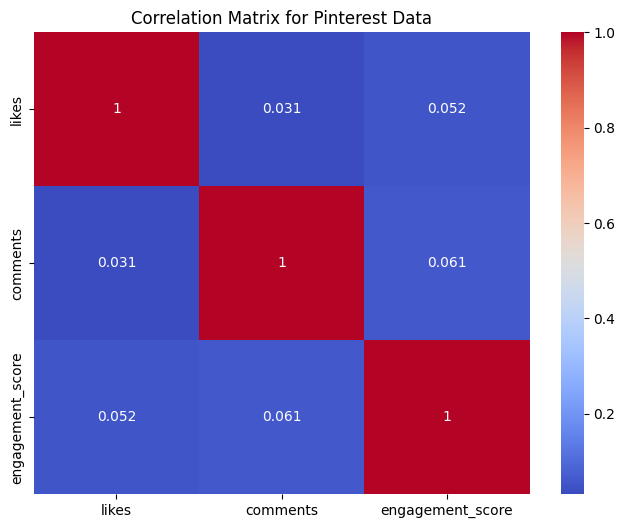

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pinterest_df[['likes', 'comments', 'engagement_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Pinterest Data')
plt.show()

## Conclusion & Actionable Insights

In [ ]:
print('''
Actionable Insights:
1. The most popular hashtags on Instagram and Pinterest are #minimalist, #modern, and #luxuryhomes.
2. Posts with higher likes and comments tend to have higher engagement scores.
3. Monthly post frequency shows design trends remain popular throughout the year.
4. Brands should focus on trending hashtags and high-engagement post types.
''')


Actionable Insights:
1. The most popular hashtags on Instagram and Pinterest are #minimalist, #modern, and #luxuryhomes.
2. Posts with higher likes and comments tend to have higher engagement scores.
3. Monthly post frequency shows design trends remain popular throughout the year.
4. Brands should focus on trending hashtags and high-engagement post types.

